In [1]:
import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# import gensim
# from gensim.utils import simple_preprocess
# import gensim.corpora as corpora
# import nltk
# from nltk.corpus import stopwords
# import spacy
# from gensim.models import CoherenceModel
# import pyLDAvis.gensim
# import pyLDAvis
# import warnings
# import matplotlib.pyplot as plt

# nltk.download('stopwords')

In [2]:
file_path = 'C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/suomi24/Data/suomi24.csv'
df = pd.read_csv(file_path)
# df

In [3]:

# Basic text preprocessing
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lower case
    return text

# Apply preprocessing to the 'thread_text' column
df['processed_text'] = df['thread_text'].astype(str).apply(preprocess_text)


In [4]:
df['datetime']

0         2001-01-18 17:18:00
1         2001-01-19 01:28:00
2         2001-01-19 06:21:00
3         2001-01-19 16:27:00
4         2001-01-20 12:49:00
                 ...         
274497    2020-12-31 17:08:00
274498    2020-12-30 17:58:00
274499    2020-12-31 06:34:00
274500    2020-12-31 13:27:00
274501    2020-12-30 22:16:00
Name: datetime, Length: 274502, dtype: object

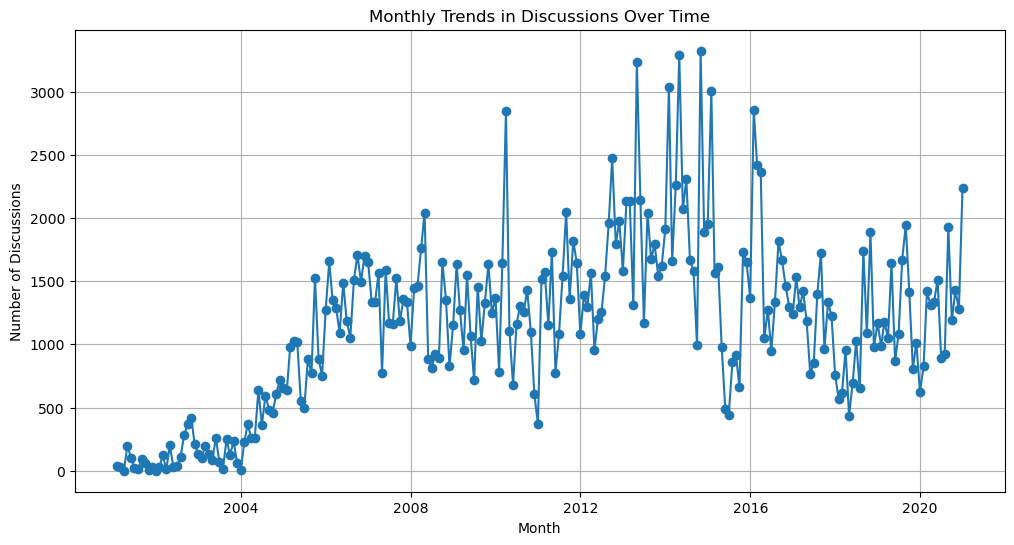

In [5]:
# Convert 'datetime' column to datetime type for easier manipulation
df['datetime'] = pd.to_datetime(df['datetime'])

# Group data by month and count occurrences
monthly_trends = df.set_index('datetime').resample('M').count()['processed_text']

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', linestyle='-')
plt.title('Monthly Trends in Discussions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Discussions')
plt.grid(True)
plt.show()


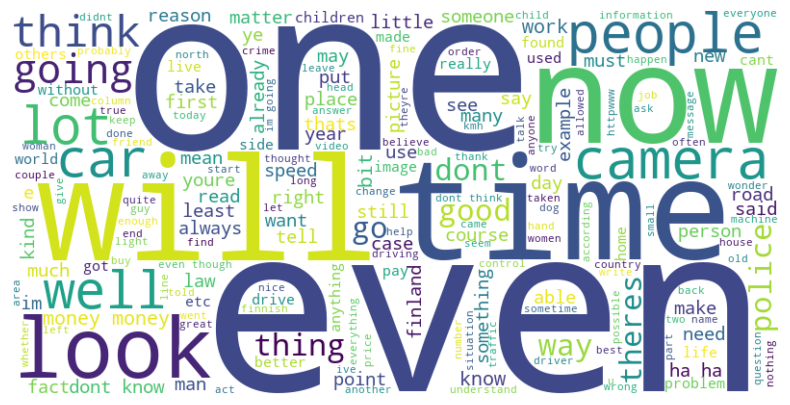

In [6]:
# Generate a word cloud for the most common words in discussions
text = ' '.join(df['processed_text'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
